# [개념정리]
## 시본(Seaborn)

* 시각화:통계분석을 위한 시각화 & 비지니스 분석을 위한 시각화
* 시각화 plot : 히스토그램, 바플롯, 박스플롯, 바이올린 플롯, 스캐터플롯, 상관 히스탭 -> hue 인자를 통해서 세분화된 정보를 표현함

**1) 히스토그램**
* 연속형 값에 대한 도수분포
* x축 : 연속형 값의 구간, y축: 해당 구간의 도수 분포(건수)
* 연속형 데이터의 분포가 정규분포인지 왜곡되어 있는지 시각화
* histplot() : Axes 레벨 함수
  
  ->histplot(  x인자, y인자, bins('구간의 개수')= , kde=True(연속 확률 분포 곡선을 그림의 유무)   )
* displot(): figure 레벨 함수

  -> figure 레벨 함수를 사용시 figure의 크기는 plt.figure()로 조절할 수 없음

  ->displot( height=세로의 크기, aspect=가로와 세로의 비율 )
* x축명 또는 y축명은 자동으로 할당됨

**+)카운트 플롯**
* 이산형 값의 건수를 막대 그래프 형태로 시각화 -> 주로 카테코리성 칼럼 값별 건수를 시각화
* countplot() 사용

**2) 바 플롯**
* 특정 칼럼의 이산 값에 따른 다른 칼럼의 연속형 값을 막대 그래프 형태를 시각화
* x축값이 이산형 값으로 값의 종류가 너무 많지 않을 때 유용하게 사용
* 보통은 y축 값은 y축에 해당하는 칼럼값의 평균이나 총합으로 표현되는 연속형 값으로 설정
* x축명과 y축을 자동으로 설정함
* 기본적으로 y축 값의 평균값을 나타냄 -> estimator 인자값을 설정하여 변경 가능
  
  ->barplot(x= ,y= , data= ,orient=v(수직 막대 그래프) or h(수평 막대 그래프), estimator=sum, hue=(세분화된 비교 정보 전달))
* y축값을 문자열로설정해서는 안된다!!
  

**3) 박스 플롯**
* 연속형 값의 사분위 IQR,최대,최소,이상치 값을 시각화
* y에 입력: 수직 박스 플롯, x에 입력 : 수평 박스 플롯

  ->boxplot(x= ,y= , data=)
* if 여러개의 수직 박스 플롯을 표현 -> 반드시 x인자는 이산형 값이 되어야 함.

**4) 바이올린 플롯**
* 히스토그램의 연속 확률분포 곡선과 박스플롯을 바이올린 형태로 시각화
* 연속형 데이터의 분포가 정규분포인지 왜곡되어 있는지 시각화

  -> violinplot(x=연속형 값 ,y=연속형 값 ,data= ,hue= )
* 여러 이산 값별로 여러개의 바이올린 플롯들을 그릴 수 있음.

**+) subplots()을 이용한 시각화**
* fig, ax=plt.subplots(nrows=, ncols=)
* sns.countplot(x=칼럼명, data=DataFrame, ax=axs[0])
  
-> 여러개의 서브플롯을 이용하면 여러개 칼럼들에 대한 시각화 정보를 한꺼번에 확인하고 비교할 수 있음. 

**5) 스캐터 플롯**
* 산점도
* x축 값, y축값 모두 연속형 숫자값을 적용해야 의미있는 시각화 정보를 얻을 수 있음
  ->scatterplot(x= , y=, hue= , style=, )
*style인자 :한단계 더 세분화된 추가 정보를 제공할 수 있음

**6) 상관히트맵**
* 상호간의 상관 관계를 시각화
* 두 속성들 간의 선형적인 연관관계를 수치화한 값
  (1) corr()를 이용해서 상관계수를 가지는 dataframe 형성
  (2) heatmap() 인자로 입력
  ->heatmap(cmap='color map으로 히트맵의 색상을 변경' , annot 인자='True일 경우 숫자로 된 상관계수 값을 표시', cbar='True일 경우 숫자값에 따른 색깔 기준 막대로 표시')

---
# [코드 필사]

In [1]:
import pandas as pd

titanic_df=pd.read_csv('titanic_train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


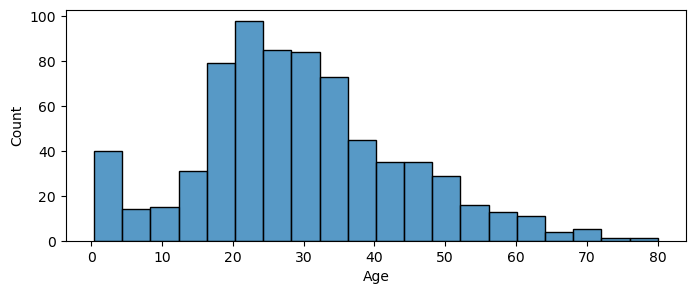

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#시본에서도 plt.figure()의 figsize 인자를 입력하여 전체 Figure의 크기 조절
plt.figure(figsize=(8,3))

# DataFrame의 칼럼명을 자동으로 인식해서 xlabel 값을 할당. ylabel 값은 count로 설정.
sns.histplot(titanic_df['Age'], bins=20)
plt.show()

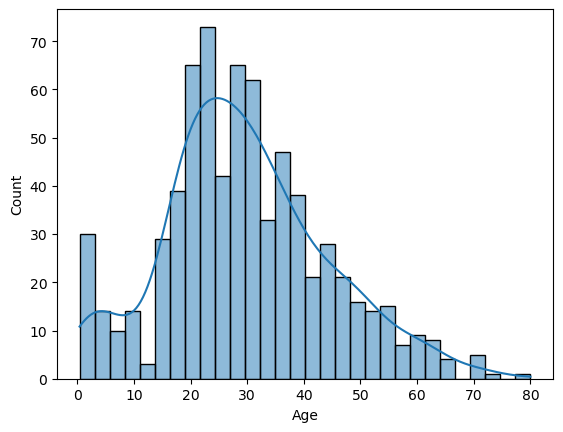

In [37]:
sns.histplot(x='Age',data=titanic_df, bins=30, kde=True)
plt.show()

<Figure size 800x400 with 0 Axes>

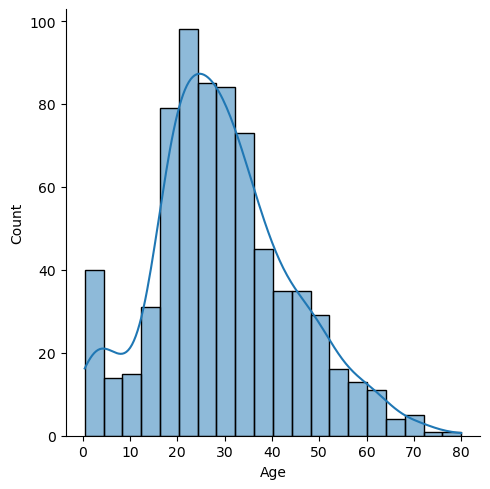

In [4]:
import seaborn as sns

#seaborn의 figure 레벨 그래프는 plt.figure()로 Figure 크기를 조절할 수 없습니다.
plt.figure(figsize=(8,4))
sns.displot(x='Age', data=titanic_df, kde=True)
plt.show()

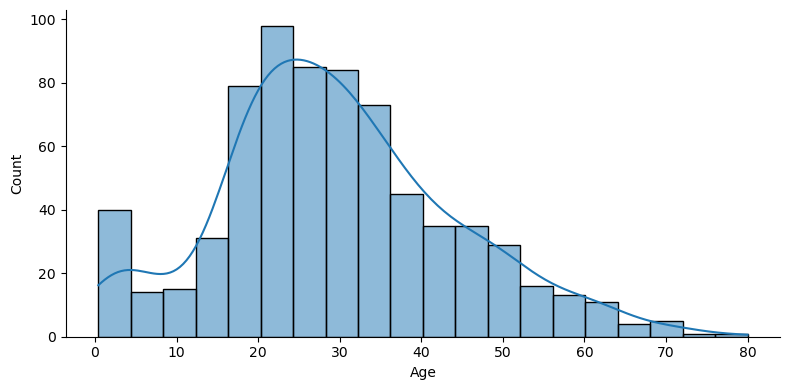

In [5]:
import seaborn as sns

sns.displot(titanic_df['Age'],kde=True, height=4, aspect=2)
plt.show()

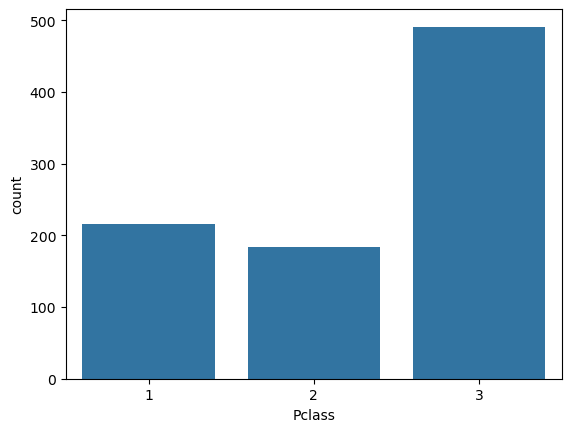

In [6]:
sns.countplot(x='Pclass',data=titanic_df)
plt.show()

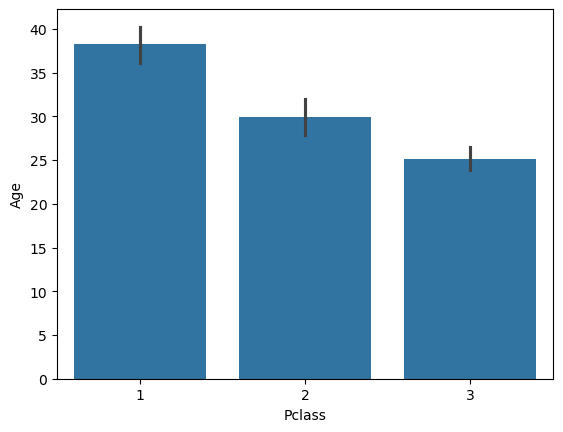

In [7]:
# 자동으로 xlabel, ylabel을 barplot()의 x인자값이 Pclass, y인자값이 Age로 설정.
sns.barplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

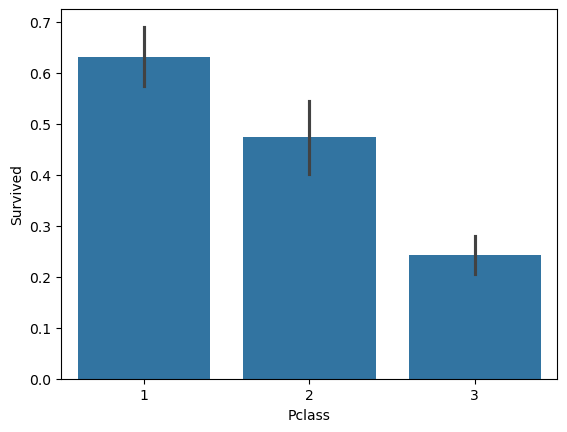

In [8]:
sns.barplot(x='Pclass',y='Survived', data=titanic_df)
plt.show()

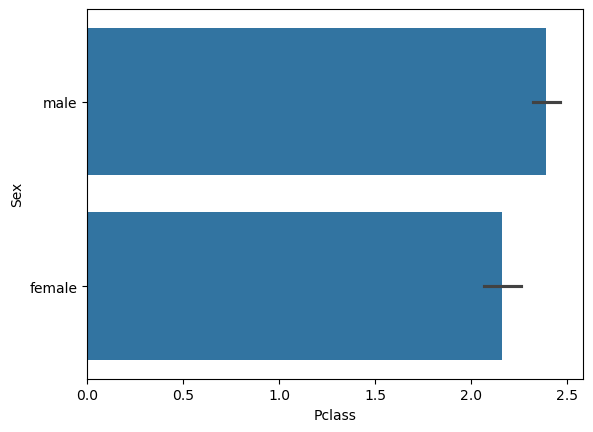

In [9]:
### y축을 문자값으로 설정하면 자동으로 수평 막대 그래프 변환
sns.barplot(x='Pclass', y='Sex', data=titanic_df)
plt.show()

<Axes: xlabel='Name', ylabel='Sex'>

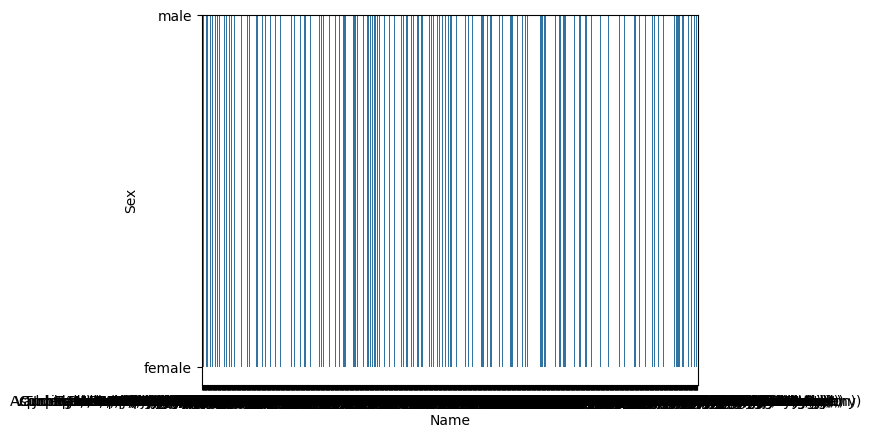

In [10]:
# x인자로 문자열인 Name을, y인자로 문자열인 Sex를 입력하므로 barplot은 오류 발생.
sns.barplot(x='Name',y='Sex',data=titanic_df)

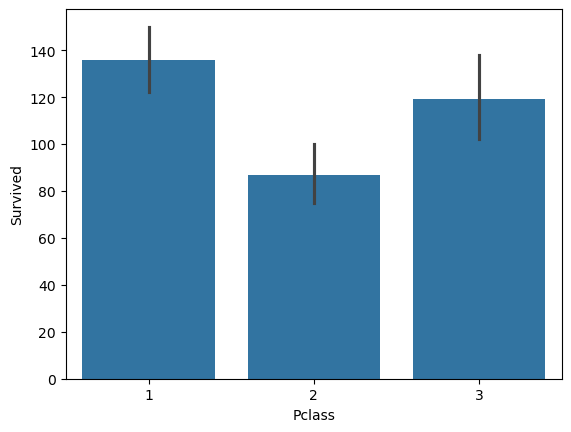

In [38]:
#estimator=sum을 적용하여 평균이 아니라 총합으로 표현.
sns.barplot(x='Pclass',y='Survived', data=titanic_df, estimator=sum)
plt.show()

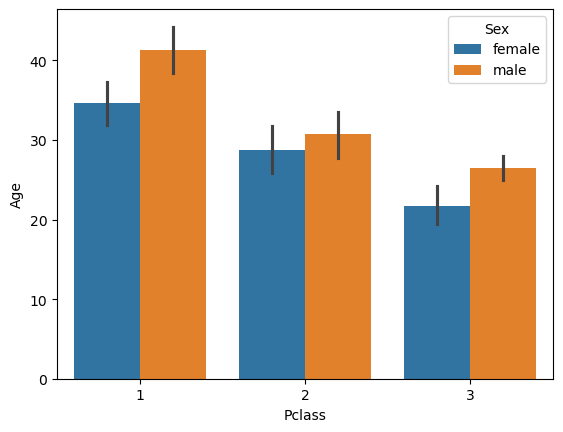

In [12]:
#아래는 Pclass가 x축이며 hue파라미터로 Sex를 설정
#개별 Pclass 값별로 Sex에 따른 Age 평균 값을 구함.
sns.barplot(x='Pclass',y='Age',hue='Sex',data=titanic_df)
plt.show()

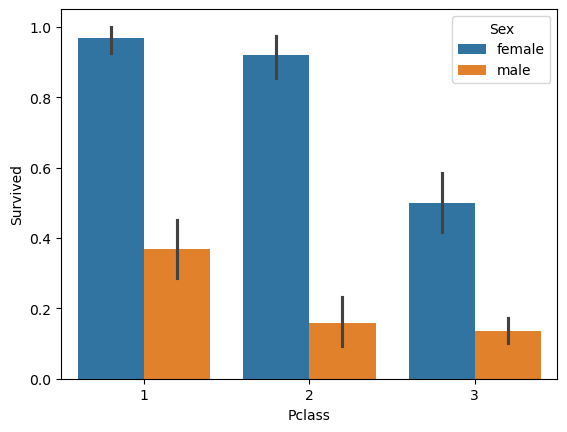

In [13]:
# 개별 Pclass 값별로 Sex에 따른 Survived 평균값을 구함.
# Pclass가 x축 값이며 Survived가 Y축값. hue 파라미터로 Sex를 설정
sns.barplot(x='Pclass',y='Survived',hue='Sex', data=titanic_df)
plt.show()

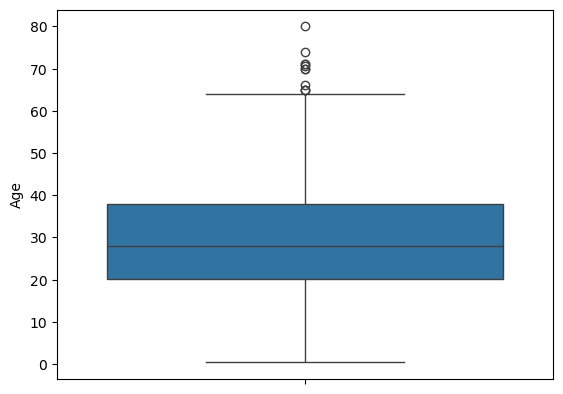

In [14]:
sns.boxplot(y='Age',data=titanic_df)
plt.show()

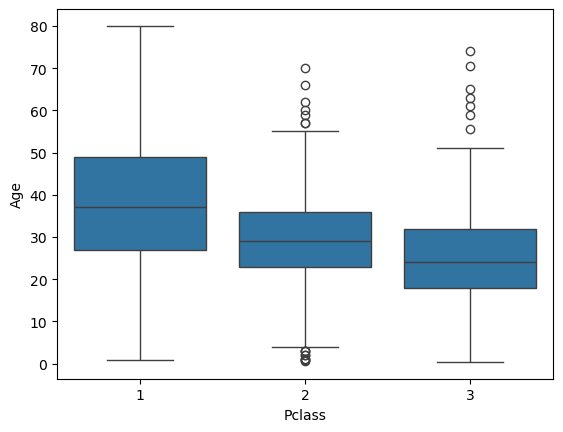

In [15]:
sns.boxplot(y='Age', x='Pclass', data=titanic_df)
plt.show()

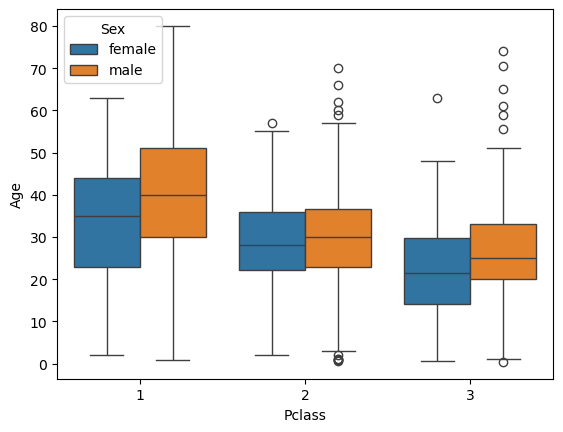

In [16]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

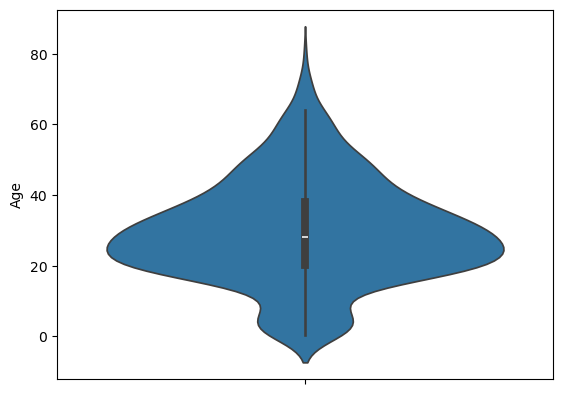

In [17]:
#Age 칼럼에 대한 수직 바이올린 플롯 시각화
sns.violinplot(y='Age', data=titanic_df)
plt.show()

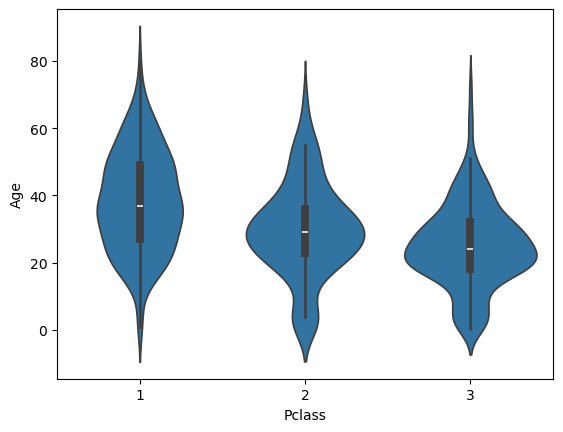

In [18]:
# x축값인 Pclass의 값별로 y축 값이 Age의 바이올린 플롯을 그림
# Pclass 값별 Age 데이터 분포를 비교하여 볼 수 있음
sns.violinplot(x='Pclass',y='Age',data=titanic_df)
plt.show()

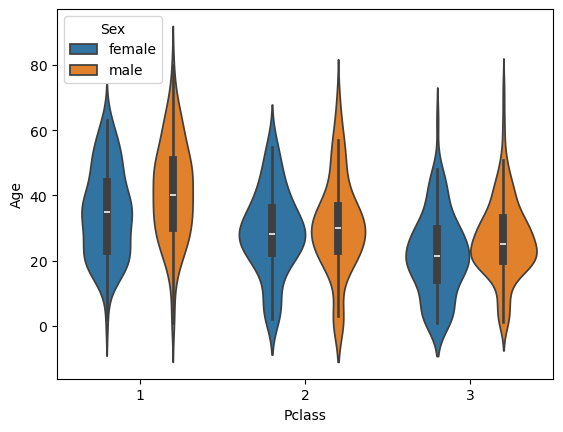

In [19]:
#x축값인 개별 Pclass 내에서 Sex별로 y축값인 Age의 바이올린 플롯을 그림
sns.violinplot(x='Pclass',y='Age', data=titanic_df, hue='Sex')
plt.show()

index: 0
index: 1
index: 2


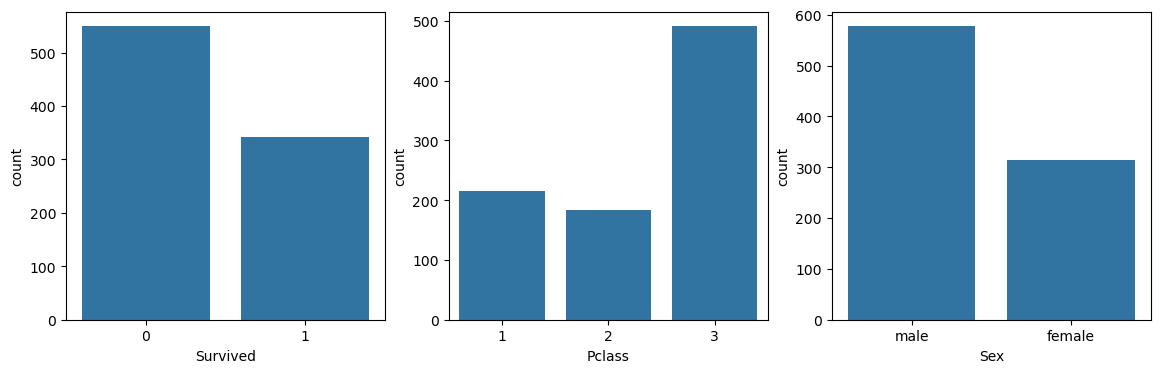

In [23]:
cat_columns=['Survived','Pclass','Sex']

#nrows는 1이고 ncols는 칼럼의 개수만큼인 subplots을 설정
fig,axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14,4))

for index,column in enumerate(cat_columns):
    print('index:', index)
    #seaborn의 Axes 레벨 function들은 ax 인자로 subplots의 어느 Axes에 위치할지 설정
    sns.countplot(x=column, data=titanic_df, ax=axs[index])

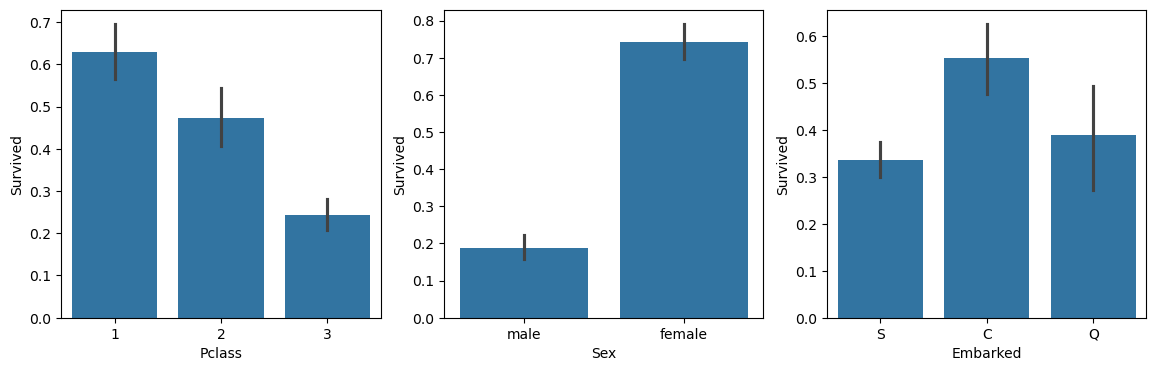

In [25]:
cat_columns=['Pclass','Sex','Embarked']

#nrows는 1이고 ncols는 칼럼의 개수만큼인 subplots을 설정
fig, axs= plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14,4))

for index, column in enumerate(cat_columns):
    #seaborn의 Axes 레벨 function들은 ax 인자로 subplots의 어느 Axes에 위치할지 설정.
    sns.barplot(x=column, y='Survived', data=titanic_df, ax=axs[index])

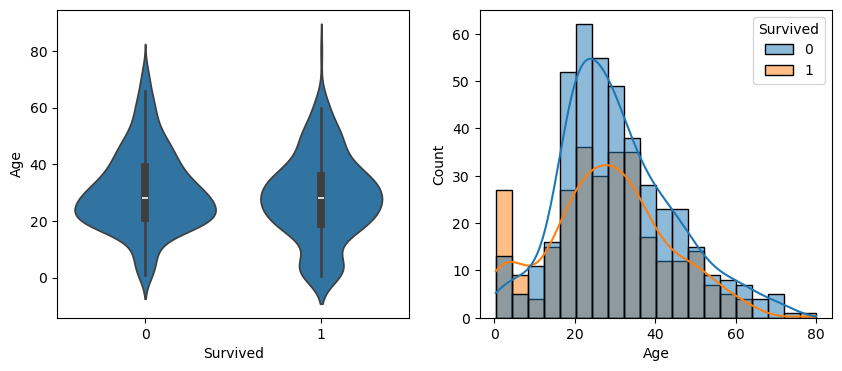

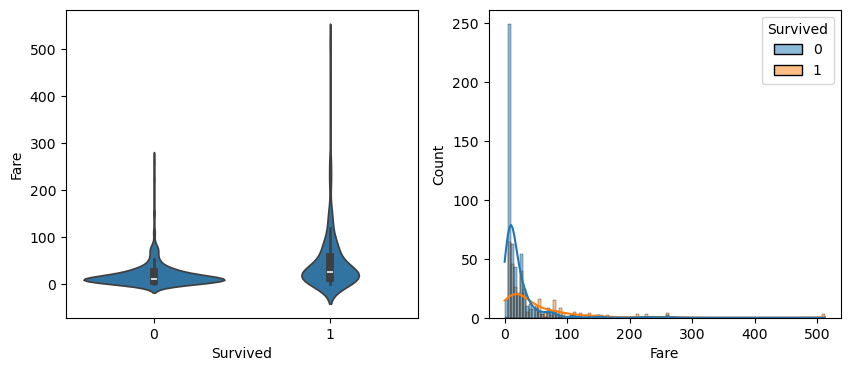

In [28]:
count_columns=['Age','Fare']

#리스트로 할당된 칼럼들의 개수만큼 루프 수행.
for column in count_columns:
    #왼쪽에는 바이올린 플롯, 오른쪽에는 히스토그램을 시각화. nrows는 1, ncols=2인 서브플롯 생성
    fig, axs = plt. subplots(nrows=1, ncols=2, figsize=(10,4))
    sns.violinplot(x='Survived', y=column, data=titanic_df, ax=axs[0])
    # 오른쪽 Axes 객체에는 Survived 값에 따른 개별 칼럼의 히스토그램 시각화
    sns.histplot(x=column, data=titanic_df, kde=True, hue='Survived', ax=axs[1])

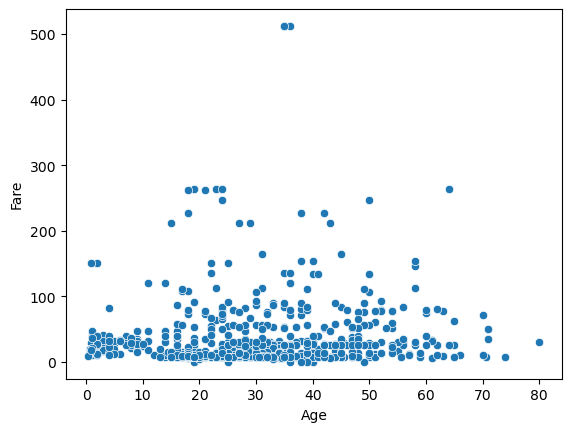

In [29]:
#x축값으로 Age를, Y축값으로 Fare를 설정
sns.scatterplot(x='Age',y='Fare', data=titanic_df)
plt.show()

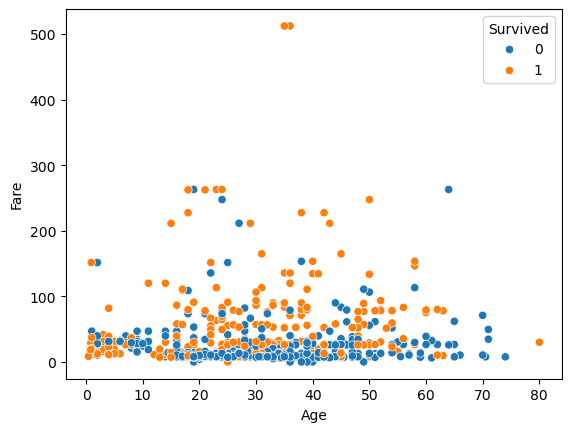

In [30]:
sns.scatterplot(x='Age',y='Fare',hue='Survived', data=titanic_df)
plt.show()

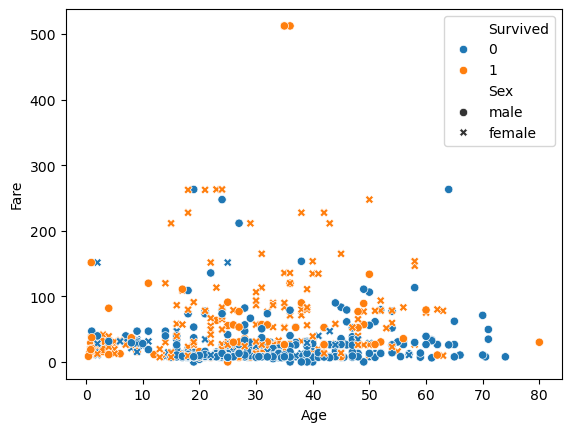

In [31]:
sns.scatterplot(x='Age',y='Fare',hue='Survived', style='Sex' ,data=titanic_df)
plt.show()

In [34]:
corr_df=titanic_df.corr(numeric_only=True)
corr_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


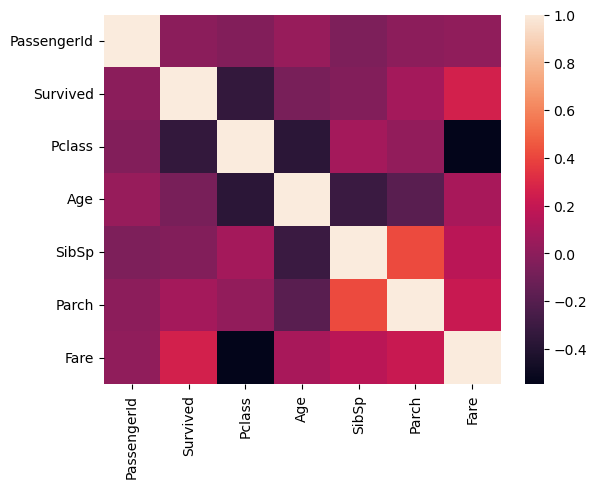

In [35]:
# 상관계수를 DataFrame으로 구하고 이를 heatmap()의 인자로 입력
corr=titanic_df.corr(numeric_only=True)
sns.heatmap(corr)
plt.show()

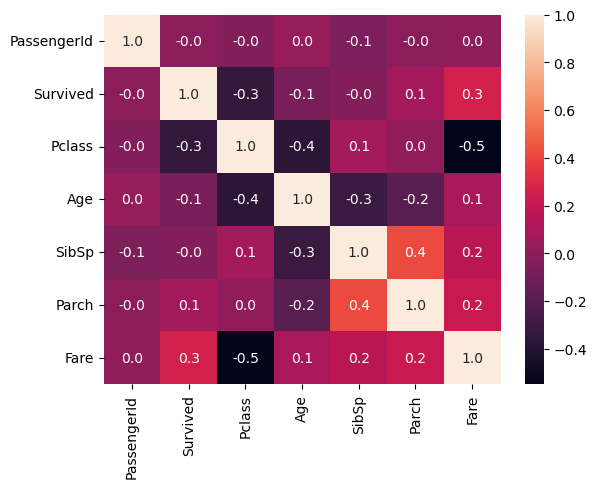

In [36]:
sns.heatmap(corr, annot=True, fmt='.1f', cbar=True)
plt.show()